1. Some References：Coference: NIPS, ICML, ICLR, ACL, AAAI；Hands on Tensorflow；Fluent Python；数学之美、黑客与画家、Deep Learning； Programming Pearls编程珠玑（198x年，Java发明者的老师，算法导论作者之一，薄，比较好的程序员翻一翻会提升好多）；Code Complete2代码大全；Artificial Intelligence A Modern Approach（3rd Edition）人工智能：一种现代方法；算法导论（算法方向）；SICP计算机程序设计的解释和构造（凭爱好看，但之后会推荐几篇论文要看）
2. What NLP concerns 1.Words 2.Entity 3.Syntax 4.Semantic 5.DIalogue 6.Reading Comprehension 7.Generation 【Representation + Policy】
3. 1.Words:jieba分词 NLP中单词是非常重要的一点 小黄车 新闻app 新词发现 
4. 2.Entity 人名、组织机构名、地点 （如果分词不用jieba分词）就成了机器学习问题，输入是周围单词，输出是词
5. 3.Syntax 判断水军 句法语法（是否正确） 解析一张表格复杂Excel 找对应关系
6. 4.Semantic 语义（判断理解后得出的结果） 2+2=？ 2++2❌ 客服评价有无吵架、骂人；'他说'的他指的是谁；深度学习下只要有足够的数据分类都能做，但往往不会有足够多的数据
7. 5.Diaglogue 对话系统-闲聊（无意义）、Task下聊（任务驱动某一领域下的对话）
8. 6.阅读理解 wiki百科 Q：奥巴马出生于那一年 A：132，137（百科中肯定有答案，在132-137个位置） 较难，目前只能达到这种
9. 7.Generation 生成 一首诗、文章、表格、单据、报告 长文章->短文/对话系统回答不上来 给出更多引问题 也是Generation

10. 知识图谱：Entity + Semantic

11. sub-fields of AI：Computer Vision，Predication and Data Mining，Optimization，Self Driving(高老师仅此没做)，Recommend System..
12. Why NLP？最难、最不成熟 Information Chaos（有用信息占比少->杂乱信息多），Unstructured（很难用一种结构表示如pdf=文字+表格；非结构化带来的问题，f(x)如果x时而一维向量时而二维向量，就没法搞了），Discrete（词语不能离散化，图像识别中的颜色RGB值甚至都可以），Uncoventional（全球语言、时间线表示-新词语同志奇葩），OOV（Out of vocabulary：可能重要信息就在新词里面，但词意思是什么其实也不知道）
13. 人的思维有多复杂NLP就有多复杂，计算机视觉与预测简化的是计算机运算，NLP是简化的人的思考🤔，NLP入门对于AI可以持续做下去，Turing‘s paper就是测试计算机语言的，除了词向量一直都没有质的突破，最classical、immature、sophistical领域of AI
14. 复杂在——1. How to flatten the parenthesizes：视频76:30 2. Remove the duplication 视频77:17

15. Some utilities for NLP: 这几节课要讲的内容
16. 1.Similarity：Edit Distance，Word Distance 2.Key words（主要讲这两个的原理）
17. 3. Name Entity Recognition 4. Dependency Parsing 5.Topic Model（这两种原理不打算深讲，因为效果并不好，除非打算做学术，可以找高老师要些资料）

### Edit Distance

### Word Embedding
1. 词嵌入：把词放入合适的地方....全部内容见博客

# Softmax

In [54]:
import numpy as np

In [55]:
vector = np.array([-1, -3, 10, 14])

In [56]:
vector

array([-1, -3, 10, 14])

In [57]:
def softmax(vec):
    exp = np.exp(vec)
    # print(exp)
    return exp / np.sum(exp)

In [58]:
softmax(vector)

array([3.00400195e-07, 4.06547454e-08, 1.79862038e-02, 9.82013455e-01])

In [59]:
sum(softmax(vector)) # 概率向量，全➕等于1

0.9999999999999999

### Softmax会遇到一个问题

In [60]:
vector_c = np.array([-1, 10000, 10, 14 ,1000, 11000])
# np.max(vector_c)

In [61]:
softmax(vector_c) # 数字太大，一除溢出

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([ 0., nan,  0.,  0., nan, nan])

##### 解决方案：给评分向量每项➖最大值(2017年月薪2w4的🎫)

In [62]:
def softmax_p(vec):
    #print(np.max(vec))
    vec = vec - np.max(vec)
    print(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [63]:
softmax_p(vector_c)

[-11001  -1000 -10990 -10986 -10000      0]


array([0., 0., 0., 0., 0., 1.])

In [64]:
vector_a = np.array([-10, 10, 24])

In [65]:
softmax_p(vector_a)

[-34 -14   0]


array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

In [66]:
sum(softmax_p(vector_a))

[-34 -14   0]


1.0

## 作业：Gensim做词向量

1. INFO: Finished 11-process extraction of 1067922 articles in 866.2s (1232.9 art/s)
2. INFO: total of page: 2416224, total of articl page: 1067922; total of used articl page: 1067922

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import os
import re
import jieba
from snownlp import SnowNLP

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
f = open("/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AA/wiki_00","r")   #打开文件
fr = f.read()                                           #读取文件
f.close()
print(fr)  

<doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学">
数学

数学是利用符号语言研究數量、结构、变化以及空间等概念的一門学科，从某种角度看屬於形式科學的一種。數學透過抽象化和邏輯推理的使用，由計數、計算、量度和對物體形狀及運動的觀察而產生。數學家們拓展這些概念，為了公式化新的猜想以及從選定的公理及定義中建立起嚴謹推導出的定理。

基礎數學的知識與運用總是個人與團體生活中不可或缺的一環。對數學基本概念的完善，早在古埃及、美索不達米亞及古印度內的古代數學文本便可觀見，而在古希臘那裡有更為嚴謹的處理。從那時開始，數學的發展便持續不斷地小幅進展，至16世紀的文藝復興時期，因为新的科學發現和數學革新兩者的交互，致使數學的加速发展，直至今日。数学并成为許多國家及地區的教育範疇中的一部分。

今日，數學使用在不同的領域中，包括科學、工程、醫學、經濟學和金融學等。數學對這些領域的應用通常被稱為應用數學，有時亦會激起新的數學發現，並導致全新學科的發展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。數學家也研究純數學，就是數學本身的实质性內容，而不以任何實際應用為目標。雖然許多研究以純數學開始，但其过程中也發現許多應用之处。

西方语言中“數學”（）一詞源自於古希臘語的（），其有“學習”、“學問”、“科學”，以及另外還有個較狹義且技術性的意思－「數學研究」，即使在其語源內。其形容詞（），意思為"和學習有關的"或"用功的"，亦會被用來指"數學的"。其在英语中表面上的複數形式，及在法语中的表面複數形式'，可溯至拉丁文的中性複數'，由西塞罗譯自希臘文複數（），此一希臘語被亚里士多德拿來指「萬物皆數」的概念。

汉字表示的「數學」一詞大約产生于中国宋元時期。多指象數之學，但有時也含有今天上的數學意義，例如，秦九韶的《數學九章》（《永樂大典》記，即《數書九章》也被宋代周密所著的《癸辛雜識》記爲《數學大略》）、《數學通軌》（明代柯尚遷著）、《数学钥》（清代杜知耕著）、《數學拾遺》（清代丁取忠撰）。直到1939年，經過中國數學名詞審查委員會研究“算學”與“數學”兩詞的使用狀況後，確認以“數學”表示今天意義上的數學含義。

數學有着久遠的歷史。它被認為起源於人類早期的生產活動：中國古代

In [23]:
import os

dirs_num = -1 # text也算一个路径，但我们只取text的子路径AA、AB, etc...
#'(r'是防止字符转义的 如果路径中出现'\t'的话 不加r的话\t就会被转义 而加了'r'之后'\t'就能保留原有的样子)
for root,dirs,files in os.walk(r"/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text"):
    dirs_num += 1
    for file in files:
        
        #获取文件所属目录
        #print(root)
        
        #获取文件路径
        print(os.path.join(root+'/'+file))
    print(dirs_num)

0
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_73
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_87
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_80
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_74
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_89
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_42
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_45
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_11
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_16
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_29
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_20
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_27
/Users/zhengtianyu/Warehouse/Command-Line/wikiextr

In [84]:
# 写成函数：获取该绝对路径下所有子路径
def get_all_dirs(data_root):
    paths = []
    for root,dirs,files in os.walk(data_root):
        for file in files:      
            #获取所有文件路径
            #print(os.path.join(root+'/'+file))
            #print(os.path.join(root+'/'+file))
            #print(type(root + '/' + file))
            paths.append(root+'/'+file)
    return paths

In [85]:
root_path = r'/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/'
get_all_dirs(root_path)

['/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_73',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_87',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_80',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_74',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_89',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_42',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_45',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_11',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_16',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_29',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_20',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_27',
 '/U

In [56]:
# T(TEST)
for root,dirs,files in os.walk(r"/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/"):
    print(root)

/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AD
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AM
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AJ
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AK
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AL
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AE
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AB
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AG
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AI
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AH
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AA
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AF


In [27]:
# T
root_path = '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/'
os.listdir(root_path)

['AC', 'AD', 'AM', 'AJ', 'AK', 'AL', 'AE', 'AB', 'AG', 'AI', 'AH', 'AA', 'AF']

In [31]:
# 别人的。。。
def get_path():
    path = []
    root_path = '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/'
    for folder1 in os.listdir(root_path):
        if folder1 == '.DS_Store': continue
        for folder2 in os.listdir(root_path + folder1 + '/'):
            if folder2 == '.DS_Store': continue
            path.append(root_path + folder1 + '/' + folder2)
    return path
get_path()

['/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_73',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_87',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_80',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_74',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_89',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_42',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_45',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_11',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_16',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_29',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_20',
 '/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_27',
 '/U

In [149]:
# 计算总文件数以计算处理进度：
file_num = len(get_all_dirs(root_path))
print(file_num)

1298


In [290]:
import re
import jieba
from snownlp import SnowNLP

# 有了目标文件路径，下面进行读取并获得数据
def get_all_data(root_path): # 输入是数据根目录
    dirs = get_all_dirs(root_path) # 一个包含所有语料文件的列表
    
    # 修改停用词表：加入'doc'(只运行一次)
#     with open('/Users/zhengtianyu/stop_words.txt', 'a')as f:
#         f.write('\n'+'doc')
        
    # 加载中文停用词表 
    with open('/Users/zhengtianyu/stop_words.txt', 'r')as f:
        stop_words = [x.strip() for x in f.readlines()]
    
    token = []
    #prod = 0 # 处理进度
    file_fin = 0 # 已处理文件数
    
    for dir in dirs: # 对每个语料文件：
        with open(dir, 'r') as rf:
            corpus = rf.readlines()
            for line in corpus:
                line = re.findall(r'\w+', line)
                if line == []:
                    continue
                else:
                    #print(type(line))
                    #words = jieba.cut(SnowNLP(line).han)
                    #print(line)
                    for e in line: # 列表中的单个字符，SnowNLP参数为列表不会转换繁简
                        #print(SnowNLP(e).han)
                        words = jieba.cut(SnowNLP(e).han)
#                         for w in words:
#                             print(w) # 🙆
                    
                    #words = SnowNLP(u'「繁體字」「繁體中文」的叫法在臺灣亦很常見。').han
                    # print(line) # 此处出现了snownlp除0错误，经输出发现有空列表，将line判空由==''改为==[]
                        clean_words = [word for word in words if word not in stop_words]
                        #token.append([word for word in words if word not in stop_words])
#                     for c_w in clean_words:
#                         print(c_w) # 🙆
                    if len(clean_words) > 0: # 去停后，以'doc'为全部str的list变为[]，要去掉（补充：并不需要）
                        token.append(clean_words)
                        #print(clean_words)
#                         for c_w in clean_words: # 这两行用列表推导式替代
#                             token.append(c_w)

#         if os.path.isfile(r'/Users/zhengtianyu/data/wiki_outputs_pro1'):
#             with open(r'/Users/zhengtianyu/data/wiki_outputs_pro1', 'wb')as f:
#                 pickle.dump(token, f)
#         else:
#             #os.makedirs(r'/Users/zhengtianyu/data/wiki_outputs_pro1')
#             os.mknod(r'/Users/zhengtianyu/data/wiki_outputs_pro1')   
#             with open(r'/Users/zhengtianyu/data/wiki_outputs_pro1', 'wb')as f:
#                 pickle.dump(token, f)
        
        with open(r'/Users/zhengtianyu/data/wiki_outputs_pro1', 'wb')as f:
            pickle.dump(token, f)
            
        
                    
                    #print(token[-1])
        # token内存了转简体、去停、分词后的所有词
        
        file_fin += 1
        print("已处理:{}%".format(file_fin / file_num * 100))

In [291]:
get_all_data(r'/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/')

已处理:0.07704160246533129%
已处理:0.15408320493066258%
已处理:0.23112480739599386%
已处理:0.30816640986132515%
已处理:0.3852080123266564%
已处理:0.46224961479198773%
已处理:0.539291217257319%
已处理:0.6163328197226503%
已处理:0.6933744221879815%
已处理:0.7704160246533128%
已处理:0.847457627118644%
已处理:0.9244992295839755%
已处理:1.0015408320493067%
已处理:1.078582434514638%
已处理:1.155624036979969%
已处理:1.2326656394453006%
已处理:1.3097072419106317%
已处理:1.386748844375963%
已处理:1.4637904468412943%
已处理:1.5408320493066257%
已处理:1.6178736517719567%
已处理:1.694915254237288%
已处理:1.7719568567026194%
已处理:1.848998459167951%
已处理:1.9260400616332818%
已处理:2.0030816640986133%
已处理:2.0801232665639446%
已处理:2.157164869029276%
已处理:2.234206471494607%
已处理:2.311248073959938%
已处理:2.3882896764252695%
已处理:2.465331278890601%
已处理:2.5423728813559325%
已处理:2.6194144838212634%
已处理:2.6964560862865947%
已处理:2.773497688751926%
已处理:2.8505392912172574%
已处理:2.9275808936825887%
已处理:3.00462249614792%
已处理:3.0816640986132513%
已处理:3.1587057010785826%
已处理:3.2357473035439135%
已

已处理:26.964560862865948%
已处理:27.041602465331277%
已处理:27.11864406779661%
已处理:27.195685670261945%
已处理:27.27272727272727%
已处理:27.349768875192602%
已处理:27.426810477657938%
已处理:27.503852080123263%
已处理:27.5808936825886%
已处理:27.65793528505393%
已处理:27.73497688751926%
已处理:27.81201848998459%
已处理:27.889060092449924%
已处理:27.966101694915253%
已处理:28.043143297380585%
已处理:28.120184899845917%
已处理:28.197226502311246%
已处理:28.274268104776578%
已处理:28.35130970724191%
已处理:28.42835130970724%
已处理:28.50539291217257%
已处理:28.582434514637907%
已处理:28.65947611710323%
已处理:28.736517719568567%
已处理:28.8135593220339%
已处理:28.890600924499232%
已处理:28.96764252696456%
已处理:29.044684129429893%
已处理:29.121725731895225%
已处理:29.198767334360554%
已处理:29.275808936825886%
已处理:29.352850539291218%
已处理:29.429892141756547%
已处理:29.50693374422188%
已处理:29.583975346687215%
已处理:29.66101694915254%
已处理:29.738058551617875%
已处理:29.815100154083208%
已处理:29.892141756548536%
已处理:29.96918335901387%
已处理:30.0462249614792%
已处理:30.12326656394453%
已处理:30.20030

已处理:54.16024653312789%
已处理:54.23728813559322%
已处理:54.314329738058554%
已处理:54.39137134052389%
已处理:54.46841294298922%
已处理:54.54545454545454%
已处理:54.622496147919875%
已处理:54.699537750385204%
已处理:54.77657935285054%
已处理:54.853620955315876%
已处理:54.930662557781204%
已处理:55.007704160246526%
已处理:55.08474576271186%
已处理:55.1617873651772%
已处理:55.238828967642526%
已处理:55.31587057010786%
已处理:55.3929121725732%
已处理:55.46995377503852%
已处理:55.54699537750385%
已处理:55.62403697996918%
已处理:55.70107858243452%
已处理:55.77812018489985%
已处理:55.855161787365184%
已处理:55.932203389830505%
已处理:56.009244992295834%
已处理:56.08628659476117%
已处理:56.163328197226505%
已处理:56.240369799691834%
已处理:56.31741140215717%
已处理:56.39445300462249%
已处理:56.47149460708783%
已处理:56.548536209553156%
已处理:56.62557781201849%
已处理:56.70261941448382%
已处理:56.779661016949156%
已处理:56.85670261941448%
已处理:56.93374422187981%
已处理:57.01078582434514%
已处理:57.08782742681048%
已处理:57.16486902927581%
已处理:57.24191063174114%
已处理:57.31895223420646%
已处理:57.3959938366718%


已处理:81.66409861325116%
已处理:81.74114021571648%
已处理:81.81818181818183%
已处理:81.89522342064714%
已处理:81.97226502311248%
已处理:82.04930662557781%
已处理:82.12634822804314%
已处理:82.20338983050848%
已处理:82.28043143297381%
已处理:82.35747303543913%
已处理:82.43451463790447%
已处理:82.5115562403698%
已处理:82.58859784283513%
已处理:82.66563944530047%
已处理:82.7426810477658%
已处理:82.81972265023111%
已处理:82.89676425269646%
已处理:82.97380585516179%
已处理:83.05084745762711%
已处理:83.12788906009246%
已处理:83.20493066255779%
已处理:83.28197226502311%
已处理:83.35901386748844%
已处理:83.43605546995377%
已处理:83.5130970724191%
已处理:83.59013867488444%
已处理:83.66718027734977%
已处理:83.7442218798151%
已处理:83.82126348228043%
已处理:83.89830508474576%
已处理:83.9753466872111%
已处理:84.05238828967643%
已处理:84.12942989214176%
已处理:84.20647149460709%
已处理:84.28351309707242%
已处理:84.36055469953774%
已处理:84.43759630200309%
已处理:84.51463790446842%
已处理:84.59167950693374%
已处理:84.66872110939909%
已处理:84.7457627118644%
已处理:84.82280431432973%
已处理:84.89984591679507%
已处理:84.9768875192

In [289]:
# 测试'wb'是重新写入还是追加————结果显示是重新写入（不要运行，否则覆盖已生成数据文件）
# with open(r'/Users/zhengtianyu/data/wiki_outputs_pro1', 'wb')as f:
#     pickle.dump(['a', 'b'], f)

# res_t = []
# with open('/Users/zhengtianyu/data/wiki_outputs_pro1', 'rb') as f:
#         res_t.extend(pickle.load(f)) 
# res_t

['a', 'b']

In [286]:
# pickle.load T ⭐️
res = []
with open('/Users/zhengtianyu/data/wiki_outputs_pro1', 'rb') as f:
        res.extend(pickle.load(f)) 
#print(res) 如果不在一起，就用这个

# 定义一个由上述列表嵌套转换为一个列表保存所有字符的函数
def list2str_convert(ori_res):
    words_corpus = []
    for l in ori_res:
        for word in l:
            #print(word)
            words_corpus.append(word)
    return words_corpus
        
res_together = list2str_convert(res)
res_together

[['狄娜'], ['狄娜'], ['俞', '琤', '林燕妮', '皆', '香港', '才女', '美誉'], ['其蒙上', '神', '祕', '传奇', '色彩'], ['1954', '年', '去世'], ['馀', '皆', '早夭'], ['可用', '科学', '解释'], ['1961', '年', '中学毕业'], ['间谍'], ['答应', '复出'], ['无线电视', '当家', '台柱'], ['细说', '当年'], ['现时', '旗下', '企业', '财务总监'], ['广'], ['近年', '参与', '欧盟', '伽利略', '定位系统', '计划'], ['2006', '年度', '香港', '小姐', '竞选', '担任', '评判', '主持'], ['今日', '成果'], ['木', '无表情'], ['这仅', '香港', '保守', '父权', '社会', '女性', '揶揄'], ['横冲直撞', '色狼'], ['当年', '哄动'], ['狄娜', '新闻炒作', '厉害'], ['狄娜', '前夫', '马益彰', '澄清', '马天', '血缘关系'], ['1990', '年', '中共', '六四', '天安门', '大屠杀', '解放军', '武力', '镇压', '学生', '百姓', '辞职', '罗宇', '结婚'], ['参与', '电视节目'], ['楠属'], ['楠属'], ['樟目', '樟科', '一属'], ['部份'], ['润楠', '属'], ['润楠', '属'], ['润楠'], ['包括', '约', '100'], ['卷', '棚顶'], ['卷', '棚顶'], ['越南', '传统', '建筑', '一种', '屋顶', '样式'], ['硬山', '变形'], ['正式', '宫廷', '相', '区分'], ['朝鲜', '昌德宫', '王妃', '寝殿', '捲', '棚顶'], ['山', '胡椒', '属'], ['山', '胡椒', '属'], ['这属', '植物', '包括', '灌木', '小乔木'], ['Linder'], ['物种', '匍伏', '茎', '无性生殖'], ['剩', '三种'], ['鸟类', '传播'

['狄娜',
 '狄娜',
 '俞',
 '琤',
 '林燕妮',
 '皆',
 '香港',
 '才女',
 '美誉',
 '其蒙上',
 '神',
 '祕',
 '传奇',
 '色彩',
 '1954',
 '年',
 '去世',
 '馀',
 '皆',
 '早夭',
 '可用',
 '科学',
 '解释',
 '1961',
 '年',
 '中学毕业',
 '间谍',
 '答应',
 '复出',
 '无线电视',
 '当家',
 '台柱',
 '细说',
 '当年',
 '现时',
 '旗下',
 '企业',
 '财务总监',
 '广',
 '近年',
 '参与',
 '欧盟',
 '伽利略',
 '定位系统',
 '计划',
 '2006',
 '年度',
 '香港',
 '小姐',
 '竞选',
 '担任',
 '评判',
 '主持',
 '今日',
 '成果',
 '木',
 '无表情',
 '这仅',
 '香港',
 '保守',
 '父权',
 '社会',
 '女性',
 '揶揄',
 '横冲直撞',
 '色狼',
 '当年',
 '哄动',
 '狄娜',
 '新闻炒作',
 '厉害',
 '狄娜',
 '前夫',
 '马益彰',
 '澄清',
 '马天',
 '血缘关系',
 '1990',
 '年',
 '中共',
 '六四',
 '天安门',
 '大屠杀',
 '解放军',
 '武力',
 '镇压',
 '学生',
 '百姓',
 '辞职',
 '罗宇',
 '结婚',
 '参与',
 '电视节目',
 '楠属',
 '楠属',
 '樟目',
 '樟科',
 '一属',
 '部份',
 '润楠',
 '属',
 '润楠',
 '属',
 '润楠',
 '包括',
 '约',
 '100',
 '卷',
 '棚顶',
 '卷',
 '棚顶',
 '越南',
 '传统',
 '建筑',
 '一种',
 '屋顶',
 '样式',
 '硬山',
 '变形',
 '正式',
 '宫廷',
 '相',
 '区分',
 '朝鲜',
 '昌德宫',
 '王妃',
 '寝殿',
 '捲',
 '棚顶',
 '山',
 '胡椒',
 '属',
 '山',
 '胡椒',
 '属',
 '这属',
 '植物',
 '包括',
 '灌木',
 '小乔木',
 'Linder

In [268]:
# pickle.pump T
import pickle

with open(r'/Users/zhengtianyu/T.txt', 'wb')as f:
    pickle.dump(['1', '2'], f, 0)

In [131]:
lists = [['1', '2'], [], ['1', '2'], []]
for l in lists:
    if l == []:continue
    print(l)

['1', '2']
['1', '2']


In [93]:
# 单文本输出T（TEST）
file_t = r'/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_44'
with open(file_t, 'r')as f:
    cs = f.readlines()
    for c in cs:
        print(c)

<doc id="285630" url="https://zh.wikipedia.org/wiki?curid=285630" title="歌賦街">

歌賦街



歌賦街（）是在香港上環的一條街道，東接鴨巴甸街，西接城皇街。



自從鄰近的中環蘭桂坊及中環蘇豪區食店租金成天價之後，此處西式餐廳開始出現，成為上環一個美食區，吸引到不少名人光顧。而近年中環整體街舖租戶變化很大，現時新租戶以國際連鎖時裝店及潮流家居擺設裝飾等店舖為主。



歌賦街之道路，自1840年開闢，命名來自當年英國來華之海軍少將休·歌賦（Hugh Gough）。清朝末年時期，四大寇常在香港上環歌賦街楊鶴齡祖產商店「楊耀記」處會面並議論中國時政，大談反清大事。此外，曾經位於歌賦街四十四號的香港首間官立學校中央書院，是中華民國國父孫中山先生曾接受教育的地方。



該街道主打商戶的印刷公司，現只剩一間。







</doc>

<doc id="285631" url="https://zh.wikipedia.org/wiki?curid=285631" title="末日迷蹤">

末日迷蹤



《末日迷蹤》〈Left Behind〉是末世小說系列中的小說，由黎曦庭（Tim LaHaye）及曾健時（Jerry B. Jenkins）所著。這是整個系列中的第一本書，2014年改编成电影《末日迷蹤》。









</doc>

<doc id="285642" url="https://zh.wikipedia.org/wiki?curid=285642" title="瓦西里科·康斯坦丁诺维奇">

瓦西里科·康斯坦丁诺维奇



瓦西里科·康斯坦丁诺维奇 Василько Константинович（1209年~1238年）古罗斯王公，罗斯托夫公爵（1218年~1238年在位）。



瓦西里科·康斯坦丁诺维奇为弗拉基米尔大公康斯坦丁·弗谢沃洛多维奇之子，母亲是一位斯摩棱斯克公主。



1218年康斯坦丁·弗谢沃洛多维奇在去世前，由于明知弗拉基米尔大公之位将落入其弟尤里·弗谢沃洛多维奇之手，为了保住其子女的封地，命令瓦西里科·康斯坦丁诺维奇到弗拉基米尔去向尤里宣誓效忠。于是后者承诺将保证瓦西里科的后代将保有罗斯托夫。



在瓦西里科·康斯坦丁诺维奇的整个统治时期，

朝鲜於1993年起全面對年滿17歲的男性實施徵兵制。根據朝鮮人民軍的兵役制度只分成2種，且服役長度都相當長：普通役120個月和特別役156個月。換言之，朝鲜的服役者需時10年或以上才能完成兵役，是世界上實行兵役時間最長的國家。因朝鲜職業工種不多，不少人於義務役後，都選擇繼續留在軍中擔任常備軍人，也因此可以解釋到朝鲜為何成為世界上軍人比例最大的國家。







</doc>

<doc id="285931" url="https://zh.wikipedia.org/wiki?curid=285931" title="猴票">

猴票



猴票，又称庚申猴，和金猴，是于1980年（庚申年）2月15日发行的一套生肖邮票。猴票是中华人民共和国发行的第一张生肖邮票。与猴票同时发行的还有一枚首日封。



猴票是特种邮票，编号为T-46，全套一枚，面值8分（人民币）。猴票背景为红色，图案是由著名画家黄永玉绘制的金丝猴。邮票原图由黄永玉绘制，邮票由邮票总设计师邵柏林设计，由姜伟杰雕刻，采用影写版与雕刻版混合套印方式印刷，由北京邮票厂印刷。猴票尺寸为26×31毫米，齿孔11.5度，一版80张（8×10）。猴票的发行量猜测在360万枚至800万枚之间，《中华人民共和国邮票目录》（2003）中记载的庚申年猴邮票的发行量为500万枚。据设计者亲自介绍，实际印量是4421600枚。



猴票由于是第一枚生肖邮票，图像美观，印刷精致，深受集邮爱好者欢迎，猴票在邮票市场价格上升很快，2011年3月一张猴票的价格已经达到12000多元，是面值的12万多倍，四方联和整版邮票的价格要更高。



虽然后来发行了第2套壬申年（1992年，同時是首套採用「中國郵政」和「CHINA」銘記的郵票）、第3套甲申年（2004年）、第4套丙申年（2016年)邮票，其中也是猴票，但通常猴票是指1980年发行的第一张猴票。



另外，朝鲜国营的朝鲜邮票社也推出过复刻版的1980年版猴票，由中国代印，相较于原版猴票质量较差，市场价值犹如天壤之别。







</doc>

<doc id="285939" url="https://zh.wikipedia.org/wiki?curid=285939" title="糖蔥餅">

糖蔥餅



糖蔥餅是一種在中國潮汕地區的小吃，最早於清朝時期出現，傳入





</doc>

<doc id="286424" url="https://zh.wikipedia.org/wiki?curid=286424" title=".bm">

.bm



.bm為百慕達國家及地區頂級域（ccTLD）的域名。







</doc>

<doc id="286425" url="https://zh.wikipedia.org/wiki?curid=286425" title=".bn">

.bn



.bn為汶萊國家及地區頂級域（ccTLD）的域名。







</doc>

<doc id="286426" url="https://zh.wikipedia.org/wiki?curid=286426" title="GameDesire">

GameDesire



GameDesire由波兰的盖尼米德公司开发并维护，2002年成立的大型在线游戏平台，有超过525万的注册用户，80多种在线游戏，以及十多种语言版本。





</doc>

<doc id="286430" url="https://zh.wikipedia.org/wiki?curid=286430" title=".bo">

.bo



.bo為玻利維亞國家及地區頂級域（ccTLD）的域名。







</doc>

<doc id="286435" url="https://zh.wikipedia.org/wiki?curid=286435" title=".br">

.br



.br為巴西國家及地區頂級域（ccTLD）的域名。









</doc>

<doc id="286437" url="https://zh.wikipedia.org/wiki?curid=286437" title=".bs">

.bs



.bs為巴哈馬國家及地區頂級域（ccTLD）的域名。







</doc>

<doc id="286440" url="https://zh.wikipedia.org/wiki?curid=286440" title=".bt">

.bt



.bt為不丹國家及地區頂級域（ccTLD）的域名。







</doc>

<doc id="286442" url="ht
























Covered



Steel



Ventilator



Refrigerator



stocK



Pig



graiN hoppe



Cement Hopper



Soda Hopper



Flat



以敞車（Gondola）或篷車（Covered）代用為平車（Flat）



Depressed



Gondola





以家畜車（stocK）代用為敞車（Gondola）



TrasH



Ballast



clAy Hopper



Ballast Hopper



Hopper



oiL tank



Gasoline Tank



Pitch Tank



benZol Tank



Toluene Tank



Molasses Tank



alcohoL



hYdrogen Tank



Hydrochloric Tank



Sulphuric Tank



Nitric Tank



Ammonia Tank



Vinyl Tank



Ethylene Tank



Caustic soda Tank



Cement Hopper Tank





Coal Water



cAboose braKe



Covered braKe



Gondola braKe













































Light rail Second GAsoline car



Light rail Diesel Rail car









Light rail SAloon





Light rail Covered Car



Light rail Open Car





Light rail Fuel Tank



Light rail Covered Car Brake van



Light rail Open Car Brake van







</doc>

<doc id="287282" url="https://zh.wikipedia.org/wiki?curid=287282" title="赤坎">


In [148]:
dirs = get_all_dirs(root_path)
# print(dirs)
for dir in dirs:
    print(dir)
# print(len(dirs))

/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_73
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_87
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_80
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_74
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_89
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_42
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_45
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_11
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_16
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_29
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_20
/Users/zhengtianyu/Warehouse/Command-Line/wikiextractor-master/text/AC/wiki_27
/Users/zhengtianyu/Warehouse/Command-Line/wikiextrac

In [120]:
from snownlp import SnowNLP
s = SnowNLP(u'「繁體字」「繁體中文」的叫法在臺灣亦很常見。')
print(s.han)

「繁体字」「繁体中文」的叫法在台湾亦很常见。


In [192]:
fantizi = ['狄娜', '原名', '梁幗馨生', '於', '廣東', '興寧籍', '貫廣東', '新會', '已故', '香港', '影星', '一生', '充滿', '傳奇', '奇女子', '之稱', '狄娜', '此藝名', '依據', '當時', '香港', '文化', '習慣', '其洋名', 'Tina', '音譯', '來', '狄娜', '称', '香江', '才女', '白韻', '琹', '俞', '琤', '林燕妮', '皆', '獲得', '香港', '才女', '美譽']
jiantizi = []
SnowNLP(fantizi).han # 说明参数只能为str，如果参数是str的list类型时，转换就不会进行
# for ftz in fantizi:
#     s = SnowNLP(ftz).han
#     jiantizi.append(s)
# jiantizi

'狄娜原名梁幗馨生于廣東興寧籍貫廣東新會已故香港影星一生充滿傳奇奇女子之稱狄娜此藝名依據當時香港文化習慣其洋名Tina音譯来狄娜称香江才女白韻琹俞琤林燕妮皆獲得香港才女美譽'

In [292]:
with open('/Users/zhengtianyu/stop_words.txt', 'r') as f:
    sw = [x.strip() for x in f.readlines()]
    print(sw)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一个', '一些', '一何', '一切', '一则', '一则通过', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一转眼', '一边', '一面', '七', '万一', '三', '三天两头', '三番两次', '三番五次', '上', '上下', '上升', '上去', '上来', '上述', '上面', '下', '下列', '下去', '下来', '下面', '不', '不一', '不下', '不久', 

In [349]:
res = []
with open('/Users/zhengtianyu/data/wiki_outputs_pro1', 'rb') as f:
    res.extend(pickle.load(f)) 
type(res)

list

In [350]:
res[50:65]

[['樟属'],
 ['樟属'],
 ['约', '300'],
 ['黄肉', '楠属'],
 ['黄肉', '楠属'],
 ['无根藤属'],
 ['无根藤属'],
 ['布于', '热带地区'],
 ['具', '分枝'],
 ['呈', '鳞片状'],
 ['总状', '花序'],
 ['具柄', '柄'],
 ['花柱', '极短'],
 ['七月', '十月', '成熟'],
 ['无根藤']]

In [301]:
# 定义一个由上述列表嵌套转换为一个列表保存所有字符的函数 (w2v后都是单个字，不对)❌
def list2str_convert(ori_res):
    words_corpus = []
    for l in ori_res:
        for word in l:
            #print(word)
            words_corpus.append(word)
    return words_corpus
        
res = list2str_convert(res)

In [364]:
max_len = 0
for r in res:
    if max_len < len(r):
        max_len = len(r)
max_len # 最长的有154个词

154

In [360]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

#path = get_tmpfile("word2vec.model")

model = Word2Vec(res, workers = 8)
#model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
#model.save("word2vec.model")

In [403]:
res[:8]

[['狄娜'],
 ['狄娜'],
 ['俞', '琤', '林燕妮', '皆', '香港', '才女', '美誉'],
 ['其蒙上', '神', '祕', '传奇', '色彩'],
 ['1954', '年', '去世'],
 ['馀', '皆', '早夭'],
 ['可用', '科学', '解释'],
 ['1961', '年', '中学毕业']]

In [35]:
model.wv.most_similar('高铁')

[('高速铁路', 0.8298995494842529),
 ('BRT', 0.8162630200386047),
 ('干线', 0.7538834810256958),
 ('客运专线', 0.7494529485702515),
 ('捷运系统', 0.7313364148139954),
 ('直通车', 0.7304508686065674),
 ('捷运', 0.7165882587432861),
 ('延伸线', 0.7156981229782104),
 ('转乘', 0.7135986089706421),
 ('客运', 0.7122704982757568)]

In [404]:
len(model.wv.vocab)

224269

In [405]:
model.save("word2vec.model")

In [36]:
model = Word2Vec.load("word2vec.model")

In [78]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    words = ['香港','股市','学生','飞机','和平']
    
    specific_tokens = {}
    for word in words:
        specific_key = word
        specific_tokens[specific_key] = model.wv.vocab[specific_key]

    for word in specific_tokens:
        #tokens.append(model[word])
        #labels.append(word)
        for sim, _ in model.wv.most_similar(word, topn=30): # ⭐️
            tokens.append(model[sim])
            labels.append(sim) # similar词
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


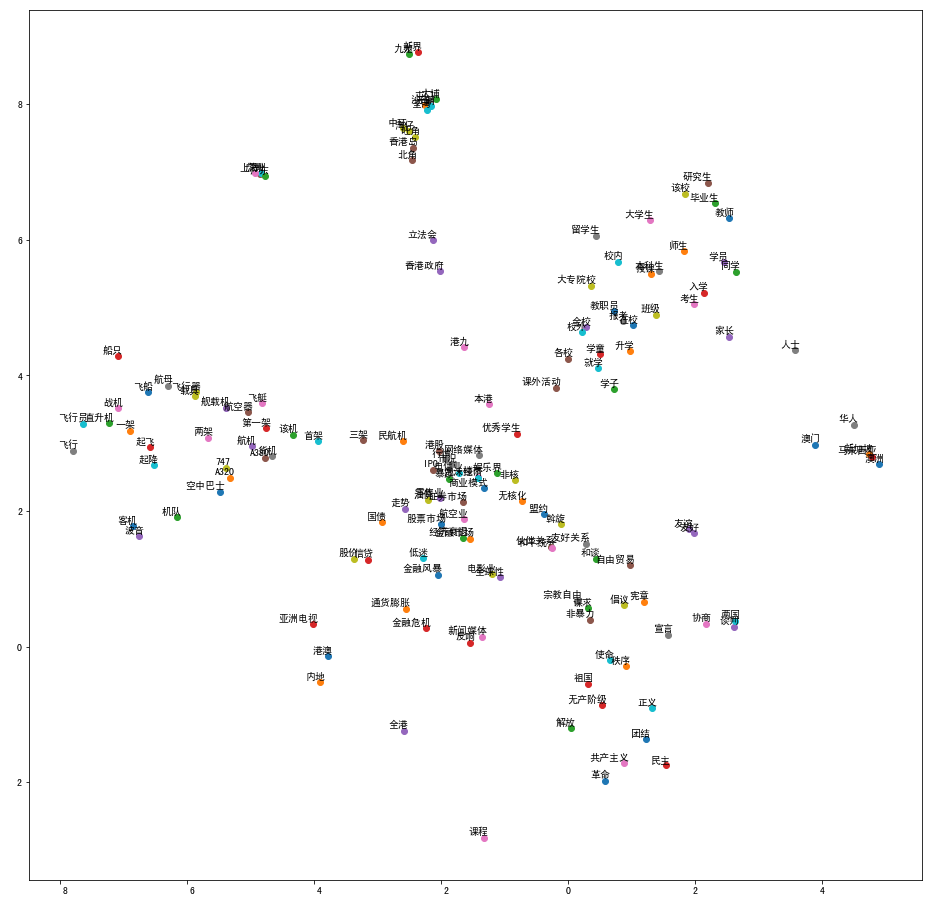

In [79]:
tsne_plot(model)

In [80]:
model.wv.most_similar('香港', topn=10)

[('澳门', 0.8723745346069336),
 ('新加坡', 0.6992698907852173),
 ('九龙', 0.6460598707199097),
 ('马来西亚', 0.6389840841293335),
 ('全港', 0.6198198795318604),
 ('广州', 0.619193971157074),
 ('本港', 0.6166795492172241),
 ('华人', 0.5986578464508057),
 ('中环', 0.5983608961105347),
 ('深圳', 0.5893625020980835)]

In [77]:
model['澳门']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.0400245 , -1.5455825 ,  1.1820681 , -1.0250589 ,  1.5468105 ,
       -0.5116435 , -3.4590414 , -1.3124218 , -1.6637114 ,  0.52601385,
       -1.9757574 , -2.598984  , -1.5476083 ,  2.2588775 , -0.23692724,
       -1.8113663 ,  0.12448604,  0.48195538, -1.7810081 ,  0.08993983,
       -1.3701584 ,  1.3071779 ,  0.14891125, -0.7242052 ,  0.19881046,
       -0.42285076, -0.04278913, -0.67359996, -0.7685944 , -2.4561307 ,
        0.81626856, -0.67508215, -2.509882  ,  2.5158815 , -0.07013051,
       -1.1542856 ,  0.90571207,  0.44373262, -0.25907108, -0.32154655,
        0.25548065,  0.11699354,  0.5238795 , -1.6003151 ,  1.9915458 ,
       -2.9694226 ,  0.99315405, -1.9479675 , -1.6050804 , -1.0759143 ,
        1.6252207 , -1.6911235 ,  2.3876088 ,  1.0148128 , -0.8091281 ,
        0.3119744 , -1.0489482 , -0.6256171 , -1.541733  , -1.0540415 ,
        1.2070898 , -0.39794448, -1.2577944 , -2.6057591 , -1.0173235 ,
        0.78801185,  1.7403531 , -1.5030268 ,  1.1499076 ,  2.33

In [37]:
model.wv.vocab

{'狄娜': <gensim.models.keyedvectors.Vocab at 0x1a34e35400>,
 '俞': <gensim.models.keyedvectors.Vocab at 0x1a416e6198>,
 '琤': <gensim.models.keyedvectors.Vocab at 0x1a416e6f60>,
 '皆': <gensim.models.keyedvectors.Vocab at 0x1a416e6ef0>,
 '香港': <gensim.models.keyedvectors.Vocab at 0x1a416e6b38>,
 '才女': <gensim.models.keyedvectors.Vocab at 0x1a416e6c88>,
 '美誉': <gensim.models.keyedvectors.Vocab at 0x1a416e62e8>,
 '神': <gensim.models.keyedvectors.Vocab at 0x1a416e6a20>,
 '祕': <gensim.models.keyedvectors.Vocab at 0x1a416e6e48>,
 '传奇': <gensim.models.keyedvectors.Vocab at 0x1a416e6d68>,
 '色彩': <gensim.models.keyedvectors.Vocab at 0x1a416e6ba8>,
 '1954': <gensim.models.keyedvectors.Vocab at 0x1a416e6860>,
 '年': <gensim.models.keyedvectors.Vocab at 0x1a416e6a58>,
 '去世': <gensim.models.keyedvectors.Vocab at 0x1a416e6c18>,
 '馀': <gensim.models.keyedvectors.Vocab at 0x1a416e6c50>,
 '早夭': <gensim.models.keyedvectors.Vocab at 0x1a416e6b00>,
 '可用': <gensim.models.keyedvectors.Vocab at 0x1a416e67b8>,
 '

In [17]:
specific_tokens = {}
specific_key = '学生'
specific_tokens[specific_key] = model.wv.vocab[specific_key]
specific_tokens

{'学生': <gensim.models.keyedvectors.Vocab at 0x1a34e455c0>}

In [22]:
words = ['香港','股市','学生','飞机','和平']
specific_tokens = {}
for word in words:
    specific_key = word
    specific_tokens[specific_key] = model.wv.vocab[specific_key]

specific_tokens

{'香港': <gensim.models.keyedvectors.Vocab at 0x1a34e35588>,
 '股市': <gensim.models.keyedvectors.Vocab at 0x1a40f61cc0>,
 '学生': <gensim.models.keyedvectors.Vocab at 0x1a34e455c0>,
 '飞机': <gensim.models.keyedvectors.Vocab at 0x1a34f6c630>,
 '和平': <gensim.models.keyedvectors.Vocab at 0x1a3f9bb3c8>}

In [40]:
model[word]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.48788577,  0.7750243 , -3.0053093 , -0.6360972 , -0.68436843,
       -1.8605653 , -0.39365873, -2.5179877 , -1.3958195 ,  1.0178357 ,
       -1.2386332 , -0.7215362 , -0.16315427,  1.4189733 ,  0.565568  ,
        0.13039553,  0.42871186, -1.2947325 , -0.19676201, -0.36673853,
       -0.7434541 , -2.2299058 ,  0.26575136, -0.28999782,  0.5927729 ,
       -0.9652179 ,  1.0837762 ,  0.43266338, -2.0006754 , -1.2131162 ,
       -0.37665793,  1.2705812 ,  0.519996  ,  0.09336884, -0.8818588 ,
       -1.7248415 ,  1.2504511 , -0.36517623, -0.3399588 , -0.4678698 ,
        0.7175733 , -1.2418085 ,  0.3365912 ,  0.6100987 , -0.06670589,
        0.59607905,  0.24802685, -1.1122928 , -1.3186224 , -0.25500056,
        0.29360697,  0.6627093 ,  1.9799817 ,  0.7964681 ,  0.41392374,
        0.3965896 ,  1.6108094 ,  0.05738266, -1.8595421 , -1.4495856 ,
       -0.92048275, -0.2728747 , -1.1072046 , -1.2266506 ,  1.3995565 ,
       -0.5383263 ,  2.1256711 , -1.7670842 ,  0.01784537, -1.43